In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cmocean
from pyqg_generative.tools.plot_helpers import *
%load_ext autoreload
%autoreload 3

import hvplot.xarray
import holoviews as hv
hvplot.output(widget_location='bottom')

import warnings
warnings.filterwarnings("ignore")

In [3]:
ds = xr.open_mfdataset('/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/Operator1-48/*.nc', combine='nested', concat_dim='run')

In [ ]:
train = ds.isel(run=slice(0,250))

In [23]:
train = ds.isel(run=slice(0,1))
train = xr.concat([train for i in range(250)], dim='run')

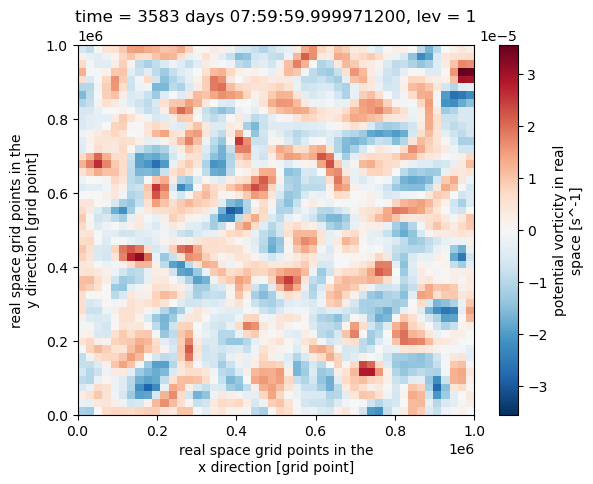

In [24]:
train.isel(time=-1,run=0,lev=0).q.plot()

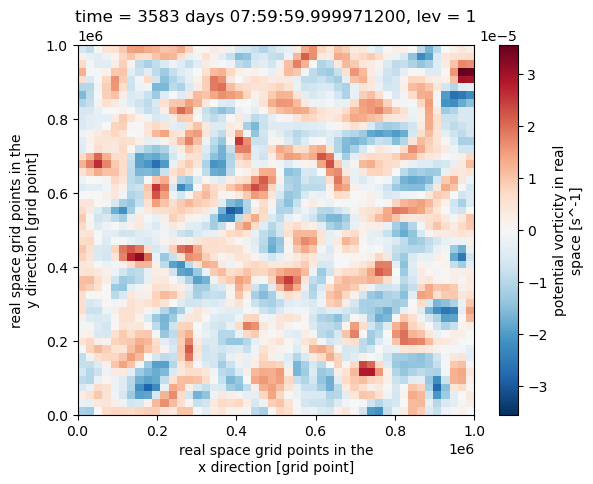

In [25]:
train.isel(time=-1,run=2,lev=0).q.plot()

In [59]:
nruns=3
train = ds.isel(run=slice(0,nruns))
if nruns < 250:
    nstacks = 250 // nruns
    train = xr.concat([train for i in range(nstacks)], dim='run')

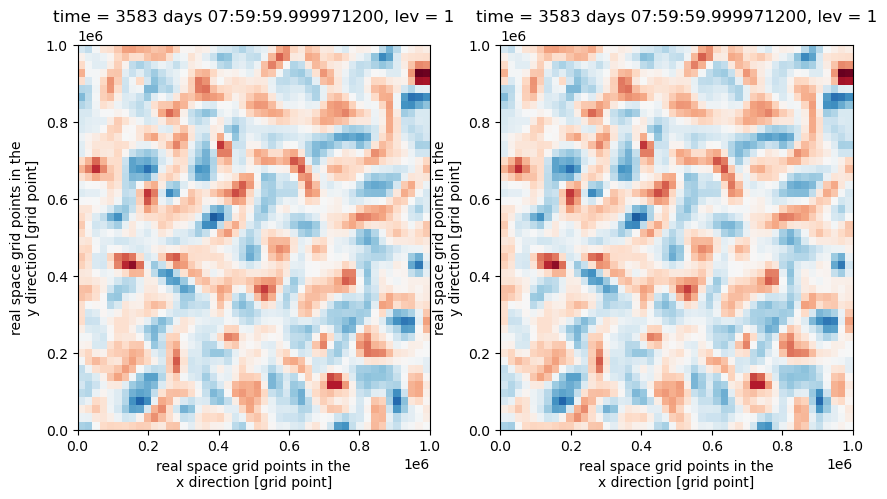

In [62]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
train.q.isel(lev=0,run=0,time=-1).plot(add_colorbar=False)
plt.subplot(1,2,2)
train.q.isel(lev=0,run=6,time=-1).plot(add_colorbar=False)

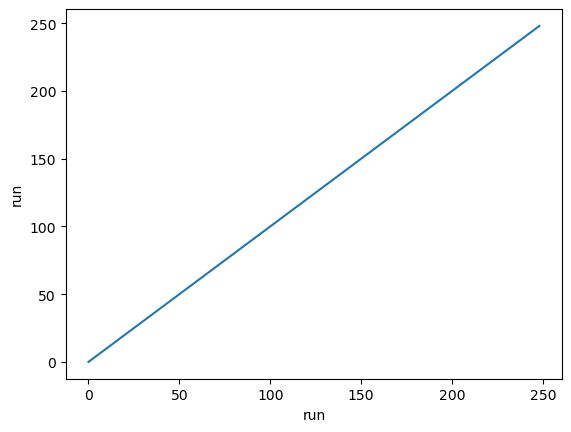

In [66]:
train.run.plot()

In [89]:
250/250 * 100

100.0

# CNN with shallow layers

In [42]:
from pyqg_generative.models.mean_var_model import MeanVarModel
from pyqg_generative.models.cgan_regression import CGANRegression
from pyqg_generative.models.cvae_regression import CVAERegression

In [35]:
MeanVarModel(hidden_channels=[3]).net_mean

AndrewCNN(
  (conv): Sequential(
    (0): Conv2d(2, 3, kernel_size=(5, 5), stride=(1, 1), padding=same, padding_mode=circular)
    (1): ReLU()
    (2): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(3, 2, kernel_size=(3, 3), stride=(1, 1), padding=same, padding_mode=circular)
  )
)

In [36]:
MeanVarModel(hidden_channels=[3]).net_var

VarCNN(
  (conv): Sequential(
    (0): Conv2d(2, 3, kernel_size=(5, 5), stride=(1, 1), padding=same, padding_mode=circular)
    (1): ReLU()
    (2): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(3, 2, kernel_size=(3, 3), stride=(1, 1), padding=same, padding_mode=circular)
  )
)

In [18]:
AndrewCNN_new(2,3)

AndrewCNN_new(
  (conv): Sequential(
    (0): Conv2d(2, 128, kernel_size=(5, 5), stride=(1, 1), padding=same, padding_mode=circular)
    (1): ReLU()
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(128, 64, kernel_size=(5, 5), stride=(1, 1), padding=same, padding_mode=circular)
    (4): ReLU()
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=same, padding_mode=circular)
    (7): ReLU()
    (8): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same, padding_mode=circular)
    (10): ReLU()
    (11): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same, padding_mode=circular)
    (13): ReLU()
    (14): BatchNorm2d(32, eps=1e-05, mome

In [40]:
CGANRegression(hidden_channels=[3]).G

AndrewCNN(
  (conv): Sequential(
    (0): Conv2d(4, 3, kernel_size=(5, 5), stride=(1, 1), padding=same, padding_mode=circular)
    (1): ReLU()
    (2): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(3, 2, kernel_size=(3, 3), stride=(1, 1), padding=same, padding_mode=circular)
  )
)

In [41]:
CGANRegression(hidden_channels=[3]).D

Sequential(
  (0): Conv2d(6, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (1): LeakyReLU(negative_slope=0.2, inplace=True)
  (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (3): Identity()
  (4): LeakyReLU(negative_slope=0.2, inplace=True)
  (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (6): Identity()
  (7): LeakyReLU(negative_slope=0.2, inplace=True)
  (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (9): Identity()
  (10): LeakyReLU(negative_slope=0.2, inplace=True)
  (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
)

In [47]:
CVAERegression(hidden_channels=[3]).decoder

AndrewCNN(
  (conv): Sequential(
    (0): Conv2d(4, 3, kernel_size=(5, 5), stride=(1, 1), padding=same, padding_mode=circular)
    (1): ReLU()
    (2): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(3, 2, kernel_size=(3, 3), stride=(1, 1), padding=same, padding_mode=circular)
  )
)

In [52]:
ds = xr.open_mfdataset('/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/Operator1-48/[0-1].nc', concat_dim='run', combine='nested').isel(time=slice(0,2))

In [57]:
CVAERegression(hidden_channels=[3,5,6]).fit(ds,ds,num_epochs=3)

Training starts on device cpu, number of samples 4
[1/3] [0.50/1.00] MSE/KL: [1.340, 1183.420] Var: [1.189,1.517] L2_mean: [1.003,1.003] L2_total: [1.000,1.000] L2_res: [1.000,1.000] Var_ratio: [0.001, 0.000]
[2/3] [0.49/0.49] MSE/KL: [1.321, 937.942] Var: [1.146,1.410] L2_mean: [1.003,1.003] L2_total: [1.000,1.000] L2_res: [1.000,1.000] Var_ratio: [0.001, 0.001]
[3/3] [0.49/0.00] MSE/KL: [1.324, 918.820] Var: [1.143,1.402] L2_mean: [1.002,1.002] L2_total: [0.999,0.999] L2_res: [1.000,1.000] Var_ratio: [0.001, 0.001]
Optimal epoch: 3
The Last epoch is used for prediction


In [66]:
import json
with open('model/model_args.json') as file:
    model_args = json.load(file)

eval(model_args.pop('model'))(**model_args)

reading CVAERegression from model


# Prediction of stochastic residuals with shallow CNN

In [3]:
gz = xr.open_dataset(
    '/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models_retrain/Operator1-48/MeanVarModel-3/offline_test.nc').isel(run=10,time=-1,lev=0)

In [4]:
gz_4layer = xr.open_dataset(
    '/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models_shallow/Operator1-48/MeanVarModel-4-layer-0/offline_test.nc').isel(run=10,time=-1,lev=0)

In [5]:
gz_2layer = xr.open_dataset(
    '/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models_shallow/Operator1-48/MeanVarModel-2-layer-0/offline_test.nc').isel(run=10,time=-1,lev=0)

gz_1layer = xr.open_dataset(
    '/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models_shallow/Operator1-48/MeanVarModel-1-layer-0/offline_test.nc').isel(run=10,time=-1,lev=0)

gz_32channel = xr.open_dataset(
    '/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models_shallow/Operator1-48/MeanVarModel-32-channels-0/offline_test.nc').isel(run=10,time=-1,lev=0)

gz_16channel = xr.open_dataset(
    '/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models_shallow/Operator1-48/MeanVarModel-16-channels-0/offline_test.nc').isel(run=10,time=-1,lev=0)

gz_3channel = xr.open_dataset(
    '/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models_shallow/Operator1-48/MeanVarModel-3-channels-0/offline_test.nc').isel(run=10,time=-1,lev=0)

In [6]:
gan = xr.open_dataset(
    '/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models_retrain/Operator1-48/CGANRegression-retrain-0/offline_test.nc').isel(run=10,time=-1,lev=0)

gan_4layer = xr.open_dataset(
    '/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models_shallow/Operator1-48/CGANRegression-4-layer-0/offline_test.nc').isel(run=10,time=-1,lev=0)

gan_2layer = xr.open_dataset(
    '/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models_shallow/Operator1-48/CGANRegression-2-layer-0/offline_test.nc').isel(run=10,time=-1,lev=0)

gan_1layer = xr.open_dataset(
    '/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models_shallow/Operator1-48/CGANRegression-1-layer-0/offline_test.nc').isel(run=10,time=-1,lev=0)

gan_32channel = xr.open_dataset(
    '/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models_shallow/Operator1-48/CGANRegression-32-channels-0/offline_test.nc').isel(run=10,time=-1,lev=0)

gan_16channel = xr.open_dataset(
    '/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models_shallow/Operator1-48/CGANRegression-16-channels-0/offline_test.nc').isel(run=10,time=-1,lev=0)

gan_3channel = xr.open_dataset(
    '/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models_shallow/Operator1-48/CGANRegression-3-channels-0/offline_test.nc').isel(run=10,time=-1,lev=0)


In [7]:
vae = xr.open_dataset(
    '/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models_retrain/Operator1-48/CVAERegression-None-0/offline_test.nc').isel(run=10,time=-1,lev=0)

vae_4layer = xr.open_dataset(
    '/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models_shallow/Operator1-48/CVAERegression-4-layer-0/offline_test.nc').isel(run=10,time=-1,lev=0)

vae_2layer = xr.open_dataset(
    '/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models_shallow/Operator1-48/CVAERegression-2-layer-0/offline_test.nc').isel(run=10,time=-1,lev=0)

vae_1layer = xr.open_dataset(
    '/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models_shallow/Operator1-48/CVAERegression-1-layer-0/offline_test.nc').isel(run=10,time=-1,lev=0)

vae_32channel = xr.open_dataset(
    '/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models_shallow/Operator1-48/CVAERegression-32-channels-0/offline_test.nc').isel(run=10,time=-1,lev=0)

vae_16channel = xr.open_dataset(
    '/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models_shallow/Operator1-48/CVAERegression-16-channels-0/offline_test.nc').isel(run=10,time=-1,lev=0)

vae_3channel = xr.open_dataset(
    '/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models_shallow/Operator1-48/CVAERegression-3-channels-0/offline_test.nc').isel(run=10,time=-1,lev=0)


In [155]:
def R2(pred,target):
    MSE = ((pred-target)**2).mean()
    VAR = (target**2).mean()
    return float(1- MSE/VAR)

In [162]:
def plot_3figures(ds, third='std', vmax_std=0.8e-11):
    vmax = 2.6728281e-11
    plt.figure(figsize=(10,3))
    plt.subplot(1,3,1)
    imshow(ds.q_forcing_advection, cmap='bwr', vmin=-vmax, vmax=vmax)
    plt.title('Subgrid forcing \n $S$')
    plt.subplot(1,3,2)
    imshow(ds.q_forcing_advection_mean, cmap='bwr', vmin=-vmax, vmax=vmax)
    plt.title('Model mean \n $\mathrm{E}(\widetilde{S}|\overline{q})$')
    R2_metric = R2(ds.q_forcing_advection_mean, ds.q_forcing_advection)
    plt.text(0,20,'$R^2=$'+'\n'+ '$1-\\frac{||r||_2^2}{||S||_2^2}$='+str(round(R2_metric,3)), fontsize=18, color='k', fontweight='bold')
    plt.subplot(1,3,3)
    res_metric = float((ds.q_forcing_advection_gen_res**2).mean() / (ds.q_forcing_advection**2).mean())
    
    if third == 'sample':
        imshow(ds.q_forcing_advection_gen_res, cmap='bwr', vmin=-vmax, vmax=vmax)
        plt.title('Simulated residual \n $\widetilde{r} = \widetilde{S} - \mathrm{E}(\widetilde{S}|\overline{q})$')
    elif third == 'std':
        imshow(ds.q_forcing_advection_std, cmap='inferno', vmax=vmax_std, vmin=0)
        plt.title('Model std \n $\mathrm{Std}(\widetilde{S}|\overline{q})$')
    
    plt.text(0,10,'$\\frac{||\widetilde{r}||_2^2}{||S||_2^2}$='+str(round(res_metric,3)), fontsize=18, color='w', fontweight='bold')

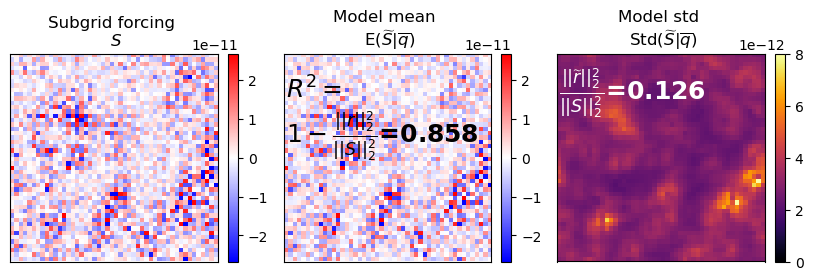

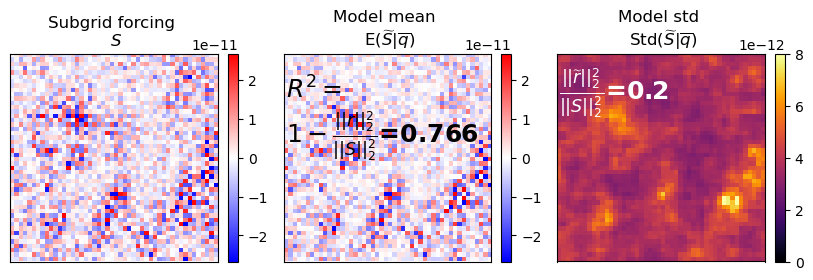

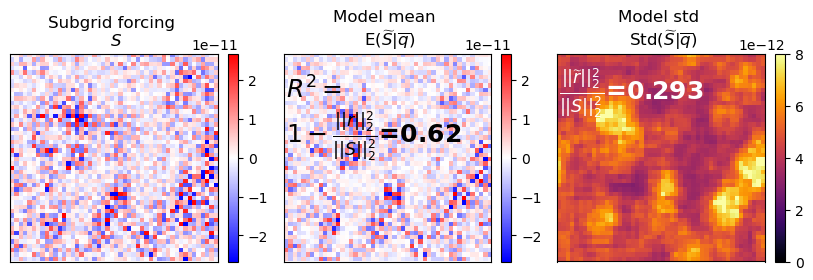

In [166]:
plot_3figures(gz)
plt.savefig('review_figures/shallow-networks/GZ-7-layers.pdf')
plot_3figures(gz_2layer)
plt.savefig('review_figures/shallow-networks/GZ-2-layers.pdf')
plot_3figures(gz_1layer)
plt.savefig('review_figures/shallow-networks/GZ-1-layers.pdf')

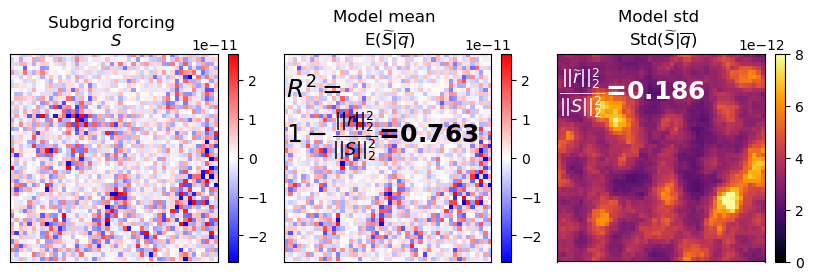

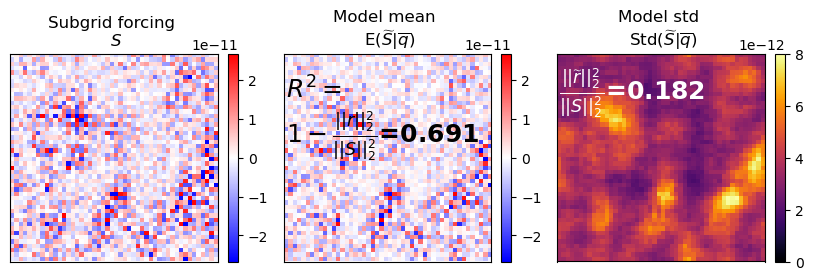

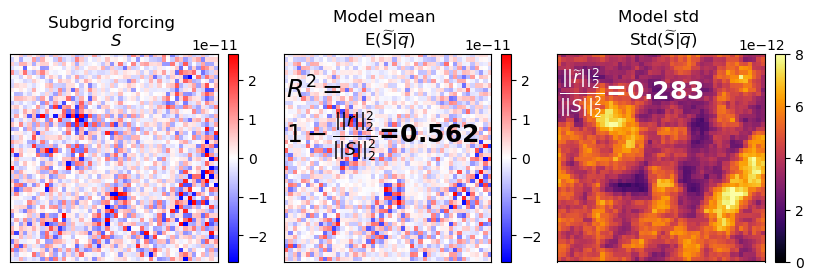

In [167]:
plot_3figures(gan)
plt.savefig('review_figures/shallow-networks/GAN-7-layers.pdf')
plot_3figures(gan_2layer)
plt.savefig('review_figures/shallow-networks/GAN-2-layers.pdf')
plot_3figures(gan_1layer)
plt.savefig('review_figures/shallow-networks/GAN-1-layers.pdf')

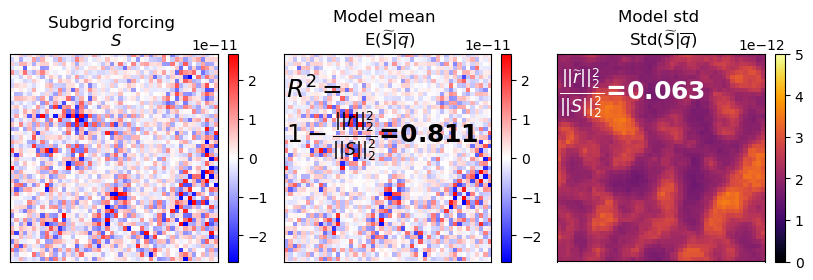

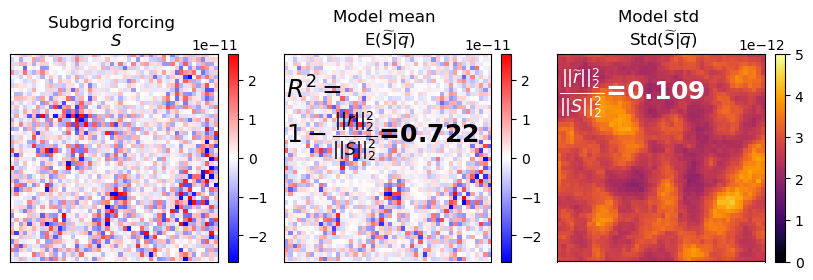

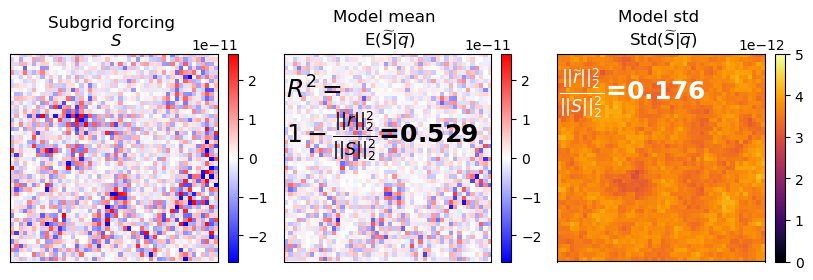

In [169]:
plot_3figures(vae, vmax_std=0.5e-11)
plt.savefig('review_figures/shallow-networks/VAE-7-layers.pdf')
plot_3figures(vae_2layer, vmax_std=0.5e-11)
plt.savefig('review_figures/shallow-networks/VAE-2-layers.pdf')
plot_3figures(vae_1layer, vmax_std=0.5e-11)
plt.savefig('review_figures/shallow-networks/VAE-1-layers.pdf')

# "True" variability of subgrid forcing. Shallow CNNs and low data regime.

In [199]:
gz = xr.open_dataset(
    '/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models_retrain/Operator1-48/MeanVarModel-3/offline_test.nc')

gz_4layer = xr.open_dataset(
    '/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models_shallow/Operator1-48/MeanVarModel-4-layer-0/offline_test.nc')

gz_2layer = xr.open_dataset(
    '/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models_shallow/Operator1-48/MeanVarModel-2-layer-0/offline_test.nc')

gz_1layer = xr.open_dataset(
    '/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models_shallow/Operator1-48/MeanVarModel-1-layer-0/offline_test.nc')

In [200]:
gan = xr.open_dataset(
    '/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models_retrain/Operator1-48/CGANRegression-retrain-0/offline_test.nc')

gan_4layer = xr.open_dataset(
    '/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models_shallow/Operator1-48/CGANRegression-4-layer-0/offline_test.nc')

gan_2layer = xr.open_dataset(
    '/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models_shallow/Operator1-48/CGANRegression-2-layer-0/offline_test.nc')

gan_1layer = xr.open_dataset(
    '/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models_shallow/Operator1-48/CGANRegression-1-layer-0/offline_test.nc')

In [201]:
vae = xr.open_dataset(
    '/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models_retrain/Operator1-48/CVAERegression-None-0/offline_test.nc')

vae_4layer = xr.open_dataset(
    '/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models_shallow/Operator1-48/CVAERegression-4-layer-0/offline_test.nc')

vae_2layer = xr.open_dataset(
    '/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models_shallow/Operator1-48/CVAERegression-2-layer-0/offline_test.nc')

vae_1layer = xr.open_dataset(
    '/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models_shallow/Operator1-48/CVAERegression-1-layer-0/offline_test.nc')

In [226]:
def MSE(ds):
    S = ds.q_forcing_advection.astype('float64')
    r = ds.q_forcing_advection_res.astype('float64')
    return float(((r**2).mean(('x', 'y', 'run', 'time')) / (S**2).mean(('x', 'y', 'run', 'time'))).mean('lev'))

In [227]:
def Spread(ds):
    S = ds.q_forcing_advection.astype('float64')
    r = ds.q_forcing_advection_gen_res.astype('float64')
    return float(((r**2).mean(('x', 'y', 'run', 'time')) / (S**2).mean(('x', 'y', 'run', 'time'))).mean('lev'))

In [115]:
gz_mse_shallow = [MSE(ds) for ds in [gz, gz_4layer, gz_2layer, gz_1layer]]
gz_spread_shallow = [Spread(ds) for ds in [gz, gz_4layer, gz_2layer, gz_1layer]]

In [116]:
gan_mse_shallow = [MSE(ds) for ds in [gan, gan_4layer, gan_2layer, gan_1layer]]
gan_spread_shallow = [Spread(ds) for ds in [gan, gan_4layer, gan_2layer, gan_1layer]]

In [117]:
vae_mse_shallow = [MSE(ds) for ds in [vae, vae_4layer, vae_2layer, vae_1layer]]
vae_spread_shallow = [Spread(ds) for ds in [vae, vae_4layer, vae_2layer, vae_1layer]]

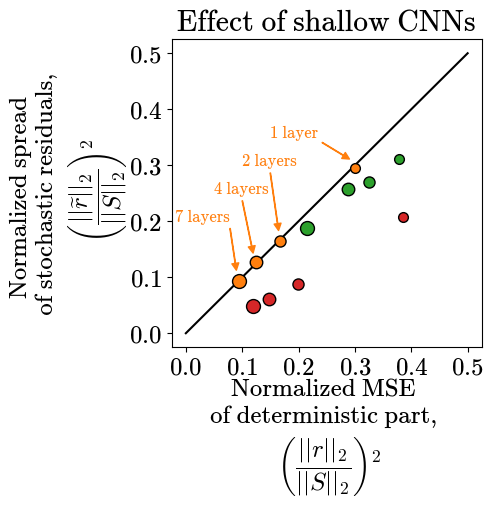

In [241]:
default_rcParams({'font.size': 18, 'axes.formatter.limits': (-3,2), 'lines.markersize': 10})
plt.plot([0,0.5], [0,0.5], 'k', label='$||r||_2=||\\widetilde{r}||_2$')
marker_size = [10, 9, 8, 7]
for j in range(len(gz_mse_shallow)):
        plt.plot(gz_mse_shallow[j],gz_spread_shallow[j], 'o', color='tab:orange', markersize=marker_size[j], markeredgecolor='k')
        plt.plot(gan_mse_shallow[j],gan_spread_shallow[j], 'o', color='tab:green', markersize=marker_size[j], markeredgecolor='k')
        plt.plot(vae_mse_shallow[j],vae_spread_shallow[j], 'o', color='tab:red', markersize=marker_size[j], markeredgecolor='k')
plt.xlabel('Normalized MSE \nof deterministic part, \n $\left(\\dfrac{||r||_2}{||S||_2} \\right)^2$')
plt.ylabel('Normalized spread \n of stochastic residuals, \n $\left(\\dfrac{||\widetilde{r}||_2}{||S||_2} \\right)^2$')
plt.xticks(np.arange(0,0.6,0.1));
plt.yticks(np.arange(0,0.6,0.1));

plt.gca().annotate('7 layers', color='tab:orange', xy=(0.09, 0.11), xytext=(-0.02, 0.2), fontsize=12,
            arrowprops=dict(color='tab:orange', shrink=0.03, width=0.3, headwidth=5, headlength=5))

plt.gca().annotate('4 layers', color='tab:orange', xy=(0.12, 0.14), xytext=(0.05, 0.25), fontsize=12,
            arrowprops=dict(color='tab:orange', shrink=0.03, width=0.3, headwidth=5, headlength=5))

plt.gca().annotate('2 layers', color='tab:orange', xy=(0.165, 0.18), xytext=(0.1, 0.3), fontsize=12,
            arrowprops=dict(color='tab:orange', shrink=0.03, width=0.3, headwidth=5, headlength=5))

plt.gca().annotate('1 layer', color='tab:orange', xy=(0.292, 0.31), xytext=(0.15, 0.35), fontsize=12,
            arrowprops=dict(color='tab:orange', shrink=0.03, width=0.3, headwidth=5, headlength=5))
plt.title('Effect of shallow CNNs')
#plt.legend(ncol=4)
plt.savefig('review_figures/spread-mse.pdf')

In [203]:
gz_250 = xr.open_dataset(
    '/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models_low_data/Operator1-48/MeanVarModel-nruns-250-0/offline_test.nc')

gz_100 = xr.open_dataset(
    '/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models_low_data/Operator1-48/MeanVarModel-nruns-100-0/offline_test.nc')

gz_50 = xr.open_dataset(
    '/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models_low_data/Operator1-48/MeanVarModel-nruns-50-0/offline_test.nc')

gz_25 = xr.open_dataset(
    '/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models_low_data/Operator1-48/MeanVarModel-nruns-25-0/offline_test.nc')

gz_5 = xr.open_dataset(
    '/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models_low_data/Operator1-48/MeanVarModel-nruns-5-0/offline_test.nc')

gz_1 = xr.open_dataset(
    '/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models_low_data/Operator1-48/MeanVarModel-nruns-1-0/offline_test.nc')

In [362]:
gan_250 = xr.open_dataset(
    '/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models_low_data/Operator1-48/CGANRegression-nruns-250-0/offline_test.nc')

gan_100 = xr.open_dataset(
    '/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models_low_data/Operator1-48/CGANRegression-nruns-100-0/offline_test.nc')

gan_50 = xr.open_dataset(
    '/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models_low_data/Operator1-48/CGANRegression-nruns-50-0/offline_test.nc')

gan_25 = xr.open_dataset(
    '/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models_low_data/Operator1-48/CGANRegression-nruns-25-0/offline_test.nc')

gan_5 = xr.open_dataset(
    '/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models_low_data/Operator1-48/CGANRegression-nruns-5-0/offline_test.nc')

gan_1 = xr.open_dataset(
    '/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models_low_data/Operator1-48/CGANRegression-nruns-1-0/offline_test.nc')

In [346]:
vae_250 = xr.open_dataset(
    '/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models_low_data/Operator1-48/CVAERegression-nruns-250-0/offline_test.nc')

vae_100 = xr.open_dataset(
    '/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models_low_data/Operator1-48/CVAERegression-nruns-100-0/offline_test.nc')

vae_50 = xr.open_dataset(
    '/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models_low_data/Operator1-48/CVAERegression-nruns-50-0/offline_test.nc')

vae_25 = xr.open_dataset(
    '/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models_low_data/Operator1-48/CVAERegression-nruns-25-1/offline_test.nc')

vae_5 = xr.open_dataset(
    '/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models_low_data/Operator1-48/CVAERegression-nruns-5-0/offline_test.nc')

vae_1 = xr.open_dataset(
    '/scratch/pp2681/pyqg_generative/Reference-Default-scaled/models_low_data/Operator1-48/CVAERegression-nruns-1-0/offline_test.nc')

In [347]:
gz_mse_nruns = [MSE(ds) for ds in [gz, gz_50, gz_25, gz_5]]
gz_spread_nruns = [Spread(ds) for ds in [gz, gz_50, gz_25, gz_5]]

In [363]:
gan_mse_nruns = [MSE(ds) for ds in [gan, gan_50, gan_25, gan_5]]
gan_spread_nruns = [Spread(ds) for ds in [gan, gan_50, gan_25, gan_5]]

In [349]:
vae_mse_nruns = [MSE(ds) for ds in [vae, vae_50, vae_25, vae_5]]
vae_spread_nruns = [Spread(ds) for ds in [vae, vae_50, vae_25, vae_5]]

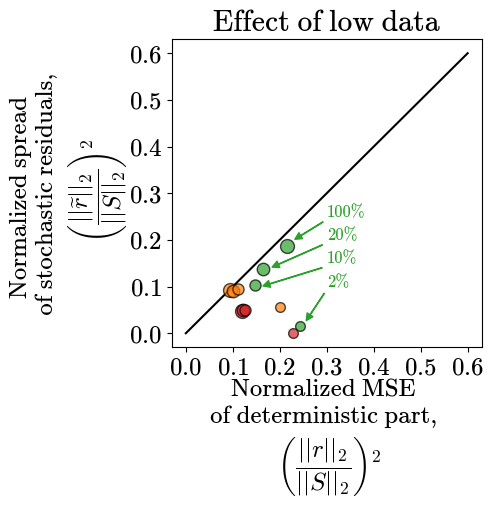

In [364]:
default_rcParams({'font.size': 18, 'axes.formatter.limits': (-3,2), 'lines.markersize': 10})
plt.plot([0,0.6], [0,0.6], 'k', label='$||r||_2=||\\widetilde{r}||_2$')
marker_size = [10, 9, 8, 7, 6, 5]
for j in range(len(gz_mse_nruns)):
        plt.plot(gz_mse_nruns[j],gz_spread_nruns[j], 'o', color='tab:orange', markersize=marker_size[j], alpha=0.7, markeredgecolor='k')
        plt.plot(gan_mse_nruns[j],gan_spread_nruns[j], 'o', color='tab:green', markersize=marker_size[j], alpha=0.7, markeredgecolor='k')
        plt.plot(vae_mse_nruns[j],vae_spread_nruns[j], 'o', color='tab:red', markersize=marker_size[j], alpha=0.7, markeredgecolor='k')

plt.xlabel('Normalized MSE \nof deterministic part, \n $\left(\\dfrac{||r||_2}{||S||_2} \\right)^2$')
plt.ylabel('Normalized spread \n of stochastic residuals, \n $\left(\\dfrac{||\widetilde{r}||_2}{||S||_2} \\right)^2$')
plt.xticks(np.arange(0,0.7,0.1));
plt.yticks(np.arange(0,0.7,0.1));

plt.gca().annotate('100%', color='tab:green', xy=(0.23, 0.2), xytext=(0.3, 0.25), fontsize=12,
            arrowprops=dict(color='tab:green', shrink=0.03, width=0.3, headwidth=5, headlength=5))

plt.gca().annotate('20%', color='tab:green', xy=(0.18, 0.14), xytext=(0.3, 0.2), fontsize=12,
            arrowprops=dict(color='tab:green', shrink=0.03, width=0.3, headwidth=5, headlength=5))

plt.gca().annotate('10%', color='tab:green', xy=(0.16, 0.1), xytext=(0.3, 0.15), fontsize=12,
            arrowprops=dict(color='tab:green', shrink=0.03, width=0.3, headwidth=5, headlength=5))

plt.gca().annotate('2%', color='tab:green', xy=(0.255, 0.025), xytext=(0.3, 0.1), fontsize=12,
            arrowprops=dict(color='tab:green', shrink=0.03, width=0.3, headwidth=5, headlength=5))


plt.title('Effect of low data')
plt.savefig('review_figures/spread-mse-low-data.pdf')

# Combined plot

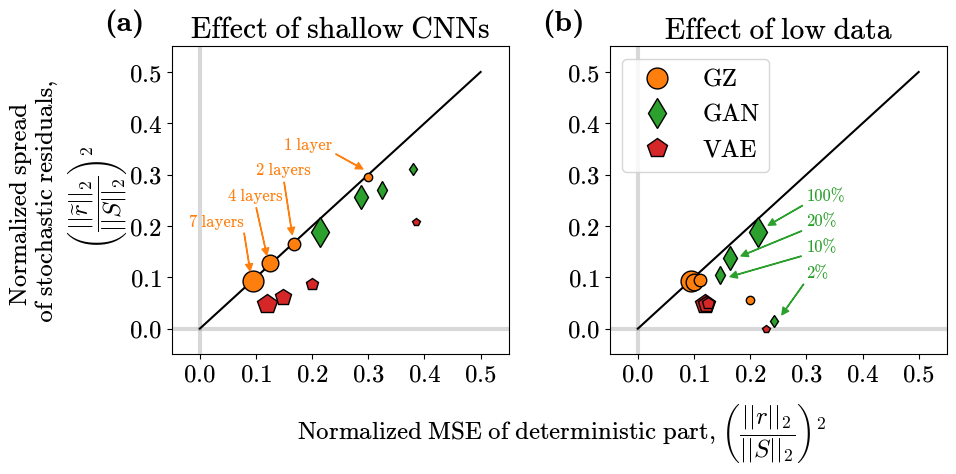

In [366]:
default_rcParams({'font.size': 18, 'axes.formatter.limits': (-3,2)})
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.axhline(y=0,color='gray', lw=3, alpha=0.3)
plt.axvline(x=0,color='gray', lw=3, alpha=0.3)
plt.plot([0,0.5], [0,0.5], 'k', label='$||r||_2=||\\widetilde{r}||_2$')
marker_size = [15, 12, 9, 6]
for j in range(len(gz_mse_shallow)):
        plt.plot(gz_mse_shallow[j],gz_spread_shallow[j], 'o', color='tab:orange', markersize=marker_size[j], markeredgecolor='k')
        plt.plot(gan_mse_shallow[j],gan_spread_shallow[j], 'd', color='tab:green', markersize=marker_size[j], markeredgecolor='k')
        plt.plot(vae_mse_shallow[j],vae_spread_shallow[j], 'p', color='tab:red', markersize=marker_size[j], markeredgecolor='k')
#plt.xlabel('Normalized MSE of deterministic part, $\left(\\dfrac{||r||_2}{||S||_2} \\right)^2$')
plt.gcf().text(0.25,-0.1,'Normalized MSE of deterministic part, $\left(\\dfrac{||r||_2}{||S||_2} \\right)^2$')
plt.ylabel('Normalized spread \n of stochastic residuals, \n $\left(\\dfrac{||\widetilde{r}||_2}{||S||_2} \\right)^2$')
plt.xticks(np.arange(0,0.6,0.1)); plt.xlim([-0.05,0.55])
plt.yticks(np.arange(0,0.6,0.1)); plt.ylim([-0.05,0.55])

plt.gca().annotate('7 layers', color='tab:orange', xy=(0.09, 0.11), xytext=(-0.02, 0.2), fontsize=12,
            arrowprops=dict(color='tab:orange', shrink=0.03, width=0.3, headwidth=5, headlength=5))

plt.gca().annotate('4 layers', color='tab:orange', xy=(0.12, 0.14), xytext=(0.05, 0.25), fontsize=12,
            arrowprops=dict(color='tab:orange', shrink=0.03, width=0.3, headwidth=5, headlength=5))

plt.gca().annotate('2 layers', color='tab:orange', xy=(0.165, 0.18), xytext=(0.1, 0.3), fontsize=12,
            arrowprops=dict(color='tab:orange', shrink=0.03, width=0.3, headwidth=5, headlength=5))

plt.gca().annotate('1 layer', color='tab:orange', xy=(0.292, 0.31), xytext=(0.15, 0.35), fontsize=12,
            arrowprops=dict(color='tab:orange', shrink=0.03, width=0.3, headwidth=5, headlength=5))
plt.title('Effect of shallow CNNs')

plt.subplot(1,2,2)
plt.axhline(y=0,color='gray', lw=3, alpha=0.3)
plt.axvline(x=0,color='gray', lw=3, alpha=0.3)

plt.plot([0,0.5], [0,0.5], 'k')
marker_size = [15, 12, 9, 6]
for j in range(len(gz_mse_nruns)):
        plt.plot(gz_mse_nruns[j],gz_spread_nruns[j], 'o', color='tab:orange', markersize=marker_size[j], markeredgecolor='k')
        plt.plot(gan_mse_nruns[j],gan_spread_nruns[j], 'd', color='tab:green', markersize=marker_size[j], markeredgecolor='k')
        plt.plot(vae_mse_nruns[j],vae_spread_nruns[j], 'p', color='tab:red', markersize=marker_size[j], markeredgecolor='k')

#plt.xlabel('Normalized MSE \nof deterministic part, \n $\left(\\dfrac{||r||_2}{||S||_2} \\right)^2$')
#plt.ylabel('Normalized spread \n of stochastic residuals, \n $\left(\\dfrac{||\widetilde{r}||_2}{||S||_2} \\right)^2$')
plt.xticks(np.arange(0,0.6,0.1)); plt.xlim([-0.05,0.55])
plt.yticks(np.arange(0,0.6,0.1)); plt.ylim([-0.05,0.55])

plt.gca().annotate('100%', color='tab:green', xy=(0.23, 0.2), xytext=(0.3, 0.25), fontsize=12,
            arrowprops=dict(color='tab:green', shrink=0.03, width=0.3, headwidth=5, headlength=5))

plt.gca().annotate('20%', color='tab:green', xy=(0.18, 0.14), xytext=(0.3, 0.2), fontsize=12,
            arrowprops=dict(color='tab:green', shrink=0.03, width=0.3, headwidth=5, headlength=5))

plt.gca().annotate('10%', color='tab:green', xy=(0.16, 0.1), xytext=(0.3, 0.15), fontsize=12,
            arrowprops=dict(color='tab:green', shrink=0.03, width=0.3, headwidth=5, headlength=5))

plt.gca().annotate('2%', color='tab:green', xy=(0.255, 0.025), xytext=(0.3, 0.1), fontsize=12,
            arrowprops=dict(color='tab:green', shrink=0.03, width=0.3, headwidth=5, headlength=5))

plt.plot(np.nan,np.nan,'o',color='tab:orange',markeredgecolor='k',label='GZ',markersize=15)
plt.plot(np.nan,np.nan,'d',color='tab:green',markeredgecolor='k',label='GAN',markersize=15)
plt.plot(np.nan,np.nan,'p',color='tab:red',markeredgecolor='k',label='VAE',markersize=15)
plt.legend()
plt.title('Effect of low data')
set_letters(fontsize=20)

plt.savefig('review_figures/mse-spread.pdf')


In [305]:
[float(ds.L2_mean) for ds in [gan, gan_50, gan_25]]

[0.4630454182624817, 0.40370646119117737, 0.3806785047054291]

In [306]:
[float(ds.L2_total) for ds in [gan, gan_50, gan_25]]

[0.07046042382717133, 0.07538671791553497, 0.07761307805776596]

In [307]:
[float(ds.L2_residual) for ds in [gan, gan_50, gan_25]]

[0.19584715366363525, 0.34994831681251526, 0.41187500953674316]

In [309]:
[float(ds.var_ratio.mean()) for ds in [gan, gan_50, gan_25]]

[0.8747721910476685, 0.8430895805358887, 0.7156968116760254]

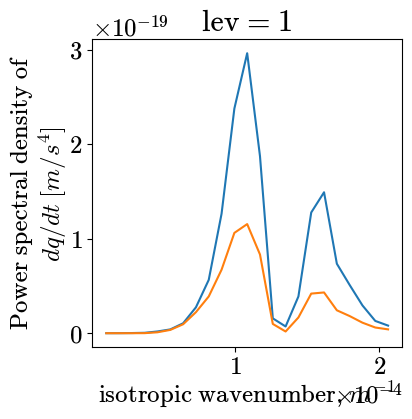

In [352]:
vae.PSD_res.isel(lev=0).plot()
vae.PSD_gen_res.isel(lev=0).plot()

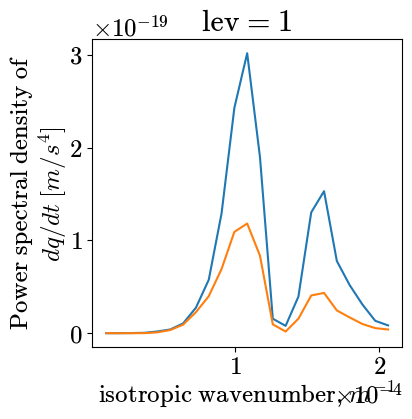

In [353]:
vae_50.PSD_res.isel(lev=0).plot()
vae_50.PSD_gen_res.isel(lev=0).plot()

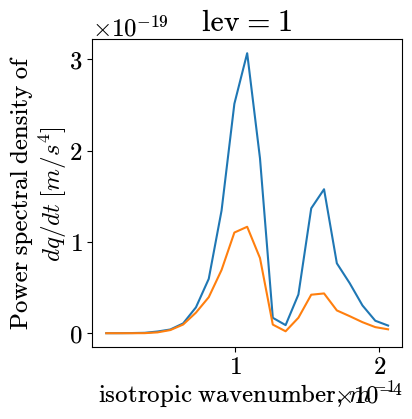

In [356]:
vae_25.PSD_res.isel(lev=0).plot()
vae_25.PSD_gen_res.isel(lev=0).plot()